

#  Datos



Conjunto de datos: Inmigración a Canada desde 1980 a 2013.



### Contexto Empresarial 

<br>

<p>Canadá ha experimentado un aumento en número de inmigrantes durante los ultimos tiempos. Quieren saber el numero de inmigrantes. Para ello han contratado un equipo para poder determinar si se trata de al estacional durante el tiempo o solo un patrón aislado.</p>

### Problema Comercial

<p> Proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente</p>

### Contexto Analítico

¿Cómo ha fluctuado el número de inmigración durante el último año ? ¿Han aumentado con el tiempo?<br>
¿Durante que periodo del año se producen la mayor cantidad de inmigración?<br>
¿Cuál es la proporción de recuento?¿De qué nacionalidades son la mayor cantidad de inmigrandes en proporcion con el total?<br>


# Presentación y objetivos del modelo

 <center> <h3>Inmigración en Canada entre los años 1980 - 2013 - Abstrac</h3> </center>
<br>
<br>

<p>Este analsis se centra en poder determinar porque Canadá, durante la década de los 70 en adelante se produjo una masiva migración hacia sus tierra, producto de sus políticas migratoria. Segun afirma Barragán(2020) en su analisis <em>"fue definitiva para consolidarse como una nación pionera en la adopción del multiculturalismo como política de Estado. Para tal fin, en 1973 se creó en “Ottawa el Ministerio de Multiculturalismo y, en 1988 esta idea se convirtió en principio básico del Estado a través de la Ley de Multiculturalismo</em>.(p.60),lo cual produjo durante estos periodos un alto nivel de inmigración.</p> <p> Que insta a interpretar la constitución canadiense desde ese marco teórico y a promoverlo activamente”. Así que en cuanto a leyes y en instituciones que materializan esta normatividad, Canadá presenta una evolución la cual se reafirma y se reajusta con el paso de los años y las situaciones que tienen que enfrentar.</p>
<p> Como asi tambien ver que otra variable a analizar es como afirma, Ocampo (2009) Tras dos décadas caracterizadas por el recrudecimiento de las crisis monetarias y financieras y un crecimiento mediocre y volátil, América Latina ha experimentado en los años 2000 un fuerte dinamismo de la actividad económica y ha reducido su vulnerabilidad financiera. Esto ha permitido que la región resista bien frente a la crisis económica internacional desatada en 2007, que la afectó más por el canal comercial que a través del canal financiero.</p>

<p>¿Cómo influyo las políticas migratorias la inmigración hacia Canadá durante los años 1980 - 2013?</p>



# Librerias, descarga y preparación de datos


In [2]:
!pip install openpyxl

In [3]:
import numpy as np  # util para computación científica en Python
import pandas as pd # biblioteca que contienen la estructura de datos de uso principal
import warnings
warnings.filterwarnings("ignore")

# manejo de data
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

In [4]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook

## Data Acquisition - Obtención de datos

In [6]:
df_can = pd.read_excel(
    'datos/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

## Analisis preliminar con Pandas Profiling -  Data Wrangling - Exploratory Data Analysis (EDA)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_can)
prof.to_file(output_file='output.html')

In [7]:
# dimensión del Dataframe (rows, columns)
df_can.shape   

(195, 43)

In [8]:
# Infomación sobre los datos
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [9]:
# Verifica si hay nulos
df_can.notnull()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
# Resumen estadístico
df_can.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000
mean,912.764,1249.015,901.754,508.395,566.990,534.723,387.436,376.497,358.862,441.272,691.133,714.390,843.241,964.379,1064.149,1136.856,1138.713,993.154,962.626,1026.077,989.154,824.241,922.144,1111.344,1244.323,1144.159,1114.344,1190.169,1320.292,1266.959,1191.821,1246.395,1275.733,1420.287,1262.533,1313.959,1320.703
std,13.083,1185.527,0.432,1949.589,2152.644,1866.998,1204.334,1198.246,1079.310,1225.577,2109.206,2443.607,2555.049,3158.730,2952.094,3330.084,3495.220,3613.336,3091.492,3321.045,3070.761,2385.944,2887.633,3664.042,3961.621,3660.580,3623.510,3710.505,4425.958,3926.718,3443.542,3694.574,3829.630,4462.946,4030.084,4247.555,4237.952
min,903.000,905.000,901.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,903.000,914.000,902.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.500,1.000,1.000,2.000,3.000,6.500,11.500,9.500,10.500,14.500,19.500,15.000,16.000,16.000,22.000,18.500,21.500,19.000,28.500,25.000,31.000,31.000,36.000,40.500,37.500,42.500,45.000
50%,908.000,922.000,902.000,13.000,10.000,11.000,12.000,13.000,17.000,18.000,26.000,34.000,44.000,38.000,51.000,74.000,85.000,76.000,91.000,118.000,114.000,106.000,116.000,138.000,169.000,165.000,161.000,191.000,210.000,218.000,198.000,205.000,214.000,211.000,179.000,233.000,213.000
75%,922.000,925.500,902.000,251.500,295.500,275.000,173.000,181.000,197.000,254.000,434.000,409.000,508.500,612.500,657.500,655.000,722.500,545.000,550.500,603.500,612.500,535.500,548.500,659.000,793.500,686.000,673.500,756.500,832.000,842.000,899.000,934.500,888.000,932.000,772.000,783.000,796.000
max,935.000,5501.000,902.000,22045.000,24796.000,20620.000,10015.000,10170.000,9564.000,9470.000,21337.000,27359.000,23795.000,31668.000,23380.000,34123.000,33720.000,39231.000,30145.000,29322.000,22965.000,21049.000,30069.000,35529.000,36434.000,31961.000,36439.000,36619.000,42584.000,33848.000,28742.000,30037.000,29622.000,38617.000,36765.000,34315.000,34129.000


In [11]:
# Primeros datos del Dataframe
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [12]:
# Ultimos datos del Dataframe
df_can.tail(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [13]:
# Muestra las columnas que conforman el Dataframe
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

#### Eliminar las columnas que no son informativas para la visualización (Type, REG, Converage).

In [14]:
df_can.drop(['DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,OdName,AREA,AreaName,REG,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


#### Renombrar las columnas

In [15]:
df_can.rename(columns={'OdName':'Country',"AREA":"Cod_continet", 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Country,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [16]:
df_can.columns = list(map(str, df_can.columns))

# comprobar el tipo de las etiquetas de las columnas
all(isinstance(column, str) for column in df_can.columns)

True

In [17]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,Country,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,65075
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,17532
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,71254
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1872
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,1848


In [18]:
continente= df_can["Continent"]


In [19]:
total= df_can["Total"]


In [20]:
df_contienten_total = pd.concat([continente, total], axis=1)


In [21]:
df_con =  df_contienten_total.groupby("Continent", axis=0).sum()
df_con

,Total
Continent,
Africa,716952
Asia,3472756
Europe,1489745
Latin America and the Caribbean,825375
Northern America,244762
Oceania,81110


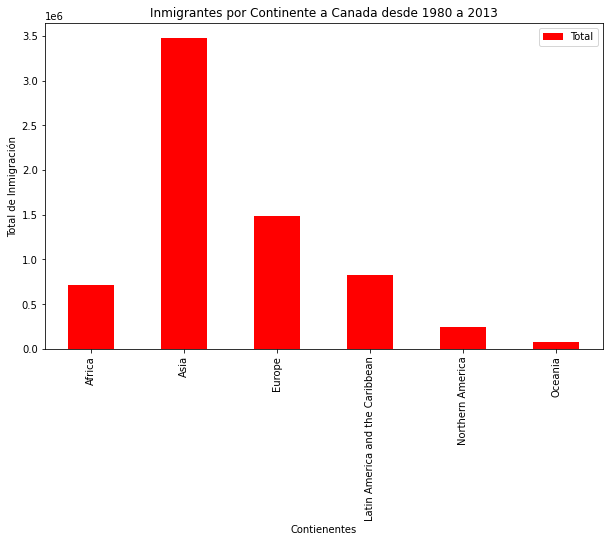

In [22]:
df_con.plot(kind="bar",color="red", figsize=(10,6))

plt.xlabel("Contienentes") # agrega al gráfico la etiqueta del eje x
plt.ylabel("Total de Inmigración") # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes por Continente a Canada desde 1980 a 2013') # agrega al gráfico el título
#plt.set_yticks("Total")#, labels=people

plt.show()

In [23]:
#unificar los datos de las americas


In [24]:
print('Dimensión de los datos:', df_can.shape)

Dimensión de los datos: (195, 41)


In [25]:
paises = df_can["Country"]

In [26]:
df_paises_total = pd.concat([paises, total], axis=1)


In [27]:
df_paises_total.sort_values(['Total'], ascending=False, axis=0, inplace=True) #selecciona los valoeres mas altos

# obtener las 10 mejores entradas
df_paises10 = df_paises_total.head(10)

# transponer el dataframe
#df_top5 = df_top5[years].transpose()

df_paises10.head()

,Country,Total
79,India,698340
36,China,661803
183,United Kingdom of Great Britain and Northern I...,553332
136,Philippines,513246
130,Pakistan,248036


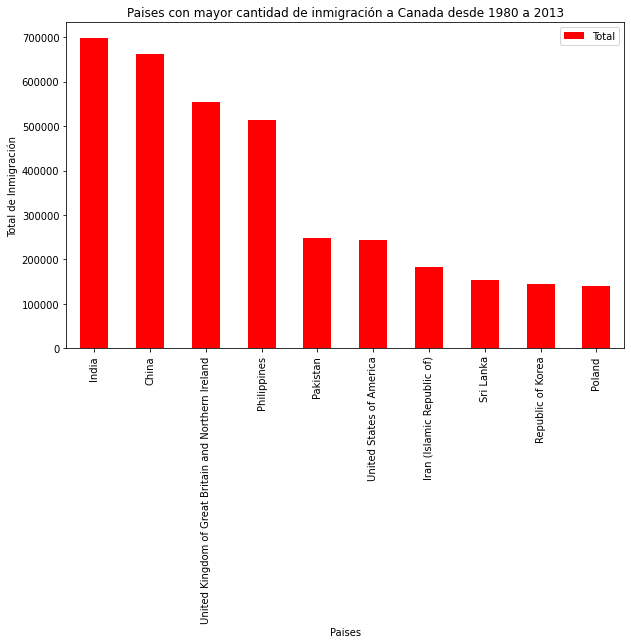

In [28]:
df_paises10.plot(kind="bar",color="red", figsize=(10,6), x = "Country")

plt.xlabel("Paises") # agrega al gráfico la etiqueta del eje x
plt.ylabel("Total de Inmigración") # agrega al gráfico la etiqueta del eje y
plt.title('Paises con mayor cantidad de inmigración a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

# Gráfico de Áreas

In [29]:
# Se crea una lista de años desde 1980 - 2013

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [30]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True) #selecciona los valoeres mas altos

# obtener las 5 mejores entradas
df_top5 = df_can.head()

# transponer el dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


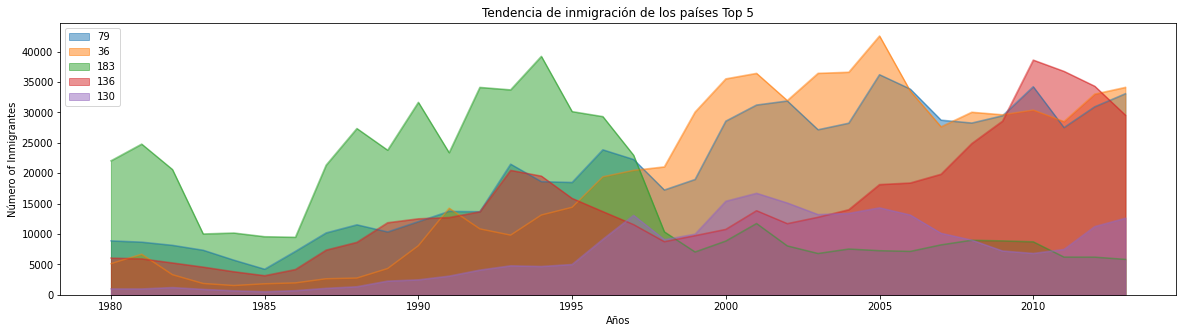

In [31]:
# se cambia los valores de índice de df_top5 para escribir un número entero para graficar
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 5))  # pasa un tamaño en la tupla (x, y)

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

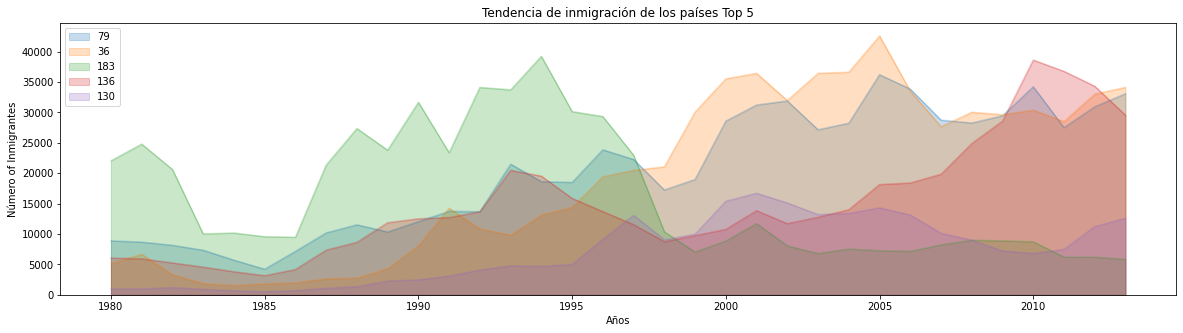

In [32]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, valor por defecto alpha = 0.5
             stacked=False,
             figsize=(20, 5))

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 0, 'Años')

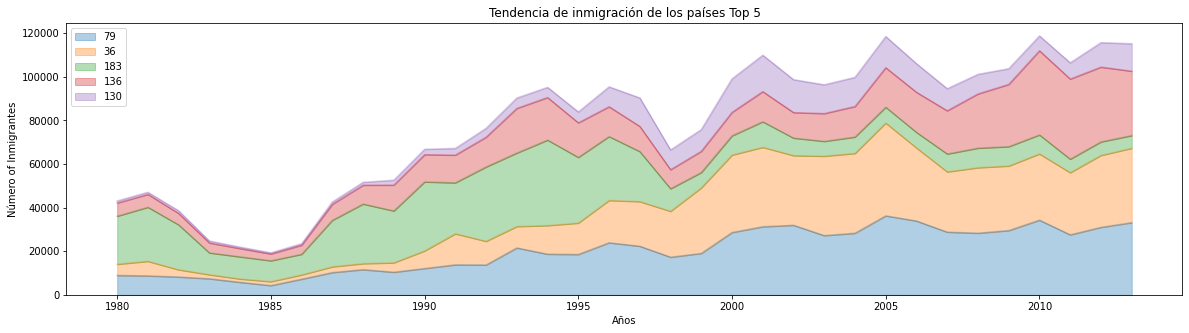

In [33]:
# opción 2: opción preferida con más flexibilidad
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 5))
print(type(ax))

ax.set_title('Tendencia de inmigración de los países Top 5')
ax.set_ylabel('Número of Inmigrantes')
ax.set_xlabel('Años')

## Histograma

¿Cuál es la distribución de frecuencias del número (población) de nuevos inmigrantes de varios países a Canadá en 2013?

In [34]:
# Vista rápida de los datos de 2013
df_can['2013'].head()

79     33087
36     34129
183     5827
136    29544
130    12603
Name: 2013, dtype: int64

In [35]:
# np.histogram devuelve 2 valores
contador, bordes_contenedores = np.histogram(df_can['2013'])

print(contador) # Contador de frecuencias
print(bordes_contenedores) # rango de contenedores, por defecto = 10 contenedores

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


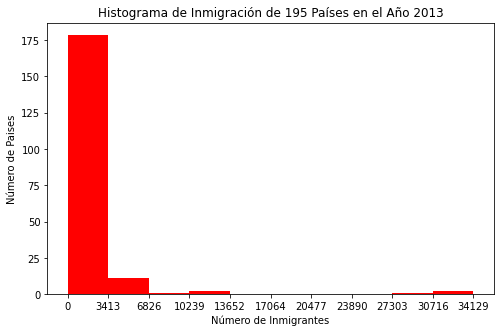

In [36]:
# 'bordes_contenedores' es una lista de intervalos de contenedores
contador, bordes_contenedores = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bordes_contenedores, color="red")

plt.title('Histograma de Inmigración de 195 Países en el Año 2013') # agregar un título al histograma
plt.ylabel('Número de Paises') # agregar etiqueta al eje y
plt.xlabel('Número de Inmigrantes') # agregar etiqueta al eje x

plt.show()

**Pregunta**: ¿Cuál es la distribución de inmigración para Dinamarca, Noruega y Suecia durante los años 1980 - 2013?

In [40]:
# mostrar el conjunto de datos
df_paises_total.loc['Denmark', 'Norway', 'Sweden']#, years]

IndexingError: Too many indexers

In [193]:
# transponer el dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


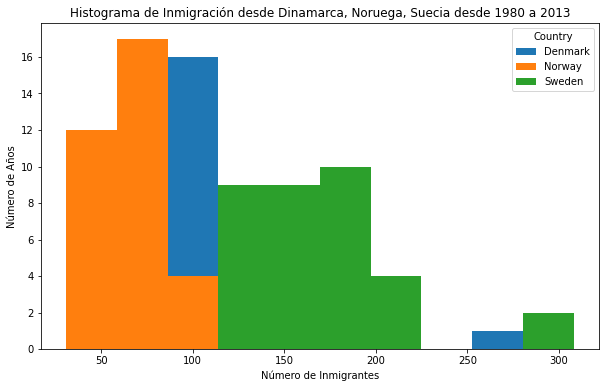

In [194]:
# generar el histograma
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

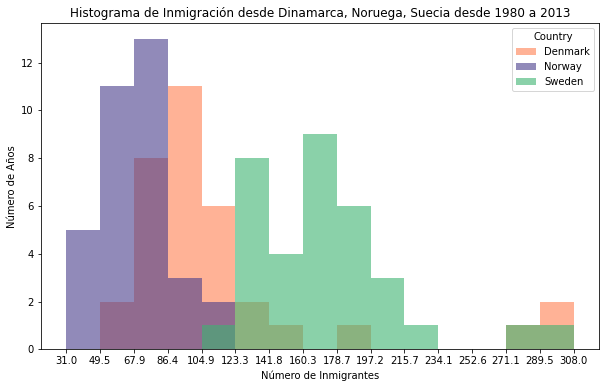

In [195]:
# obtener los valores de marcas del eje x
contador, bordes_contenedores = np.histogram(df_t, 15)

# histograma no apilado
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bordes_contenedores,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

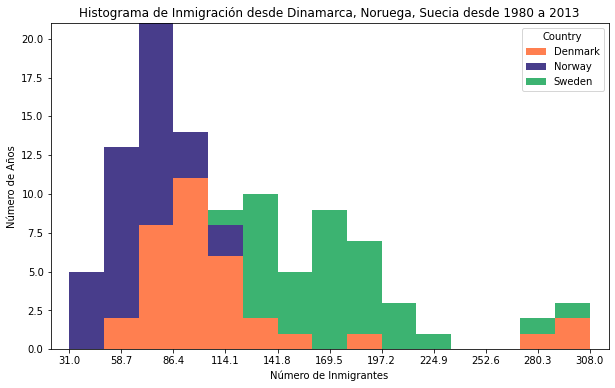

In [196]:
contador, bordes_contenedores = np.histogram(df_t, 10)
xmin = bordes_contenedores[0] - 10   #  el valor del primer contenedor es 31.0, se descuenta un búfer de 10 por motivos estéticos 
xmax = bordes_contenedores[-1] + 10  #  el último valor del contenedor es 308.0, se agrega un búfer de 10 por motivos estéticos

# Histograma apilable
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bordes_contenedores,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histograma de Inmigración desde Dinamarca, Noruega, Suecia desde 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de Inmigrantes')

plt.show()

## Gráfico de Barras 

**Se empezará analizando el efecto de la crisis financiera de Islandia:**

La crisis financiera islandesa de 2008 - 2011 fue un evento económico y político importante en Islandia. En relación con el tamaño de su economía, el colapso bancario sistémico de Islandia fue el mayor experimentado por cualquier país en la historia económica. La crisis condujo a una grave depresión económica entre 2008 y 2011 ya un importante malestar político.

**Pregunta:** Comparar el número de inmigrantes islandeses (country = 'Iceland') en Canadá desde el año 1980 hasta el 2013.

In [202]:
# paso 1: obtener los datos
df_islandia = df_can.loc['Iceland', years]
df_islandia.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

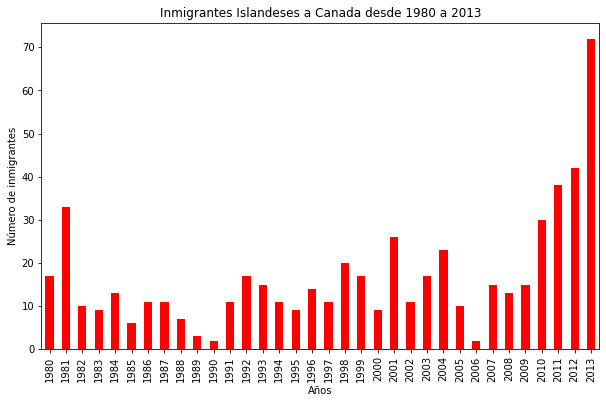

In [229]:
# paso 2: graficar los datos
df_islandia.plot(kind='bar', figsize=(10, 6), color= "red")

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

El gráfico de barras de arriba muestra el número total de inmigrantes desglosados ​​por cada año. Podemos ver claramente el impacto de la crisis financiera; el número de inmigrantes a Canadá comenzó a aumentar rápidamente después de 2008.

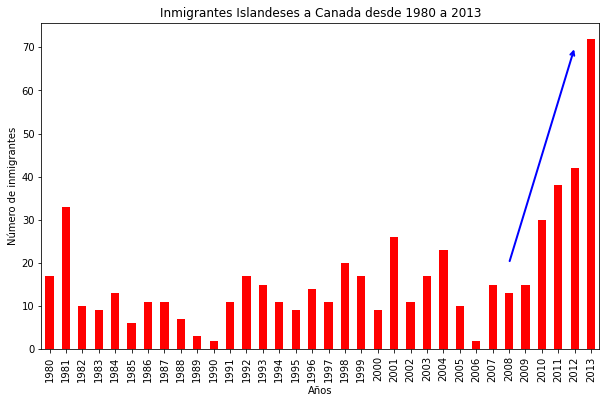

In [230]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90, color="red")  # rota las marcas del eje x (puntos etiquetados en el eje x) en 90 grados

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

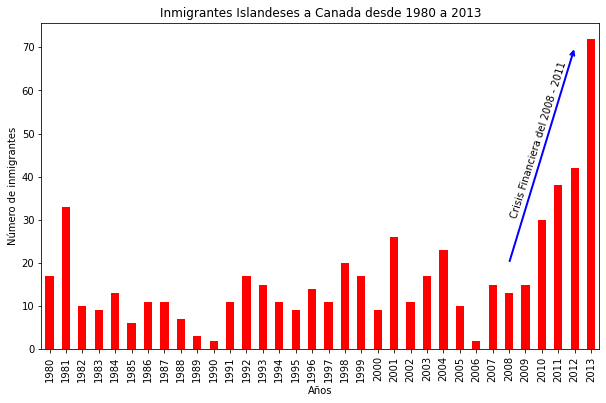

In [231]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90, color="red")

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Texto de la anotación
plt.annotate('Crisis Financiera del 2008 - 2011',  # texto a mostrar
             xy=(28, 30),  # comienzo del texto en el punto (año 2008 , pobla 30)
             rotation=72.5,  # Basado en la técnica de prueba y error para calzar con la flecha
             va='bottom',  # alineación vertical
             ha='left',  # alineación horizontal
             )

plt.show()

In [206]:
df_arg = df_can.loc['Argentina', years]
df_arg.head()


1980    368
1981    426
1982    626
1983    241
1984    237
Name: Argentina, dtype: object

<AxesSubplot:xlabel='Argentina', ylabel='Count'>

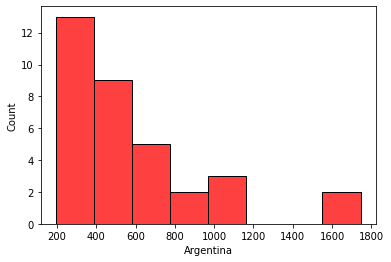

In [232]:
sns.histplot(data=df_arg, color="red")

<center> <h2> Crisis económica en Argentina entre 2001-2005 </center></h2>

A partir del 2006 empieza a disminuir la inmigración producto de la estabilidad económica en ese país.

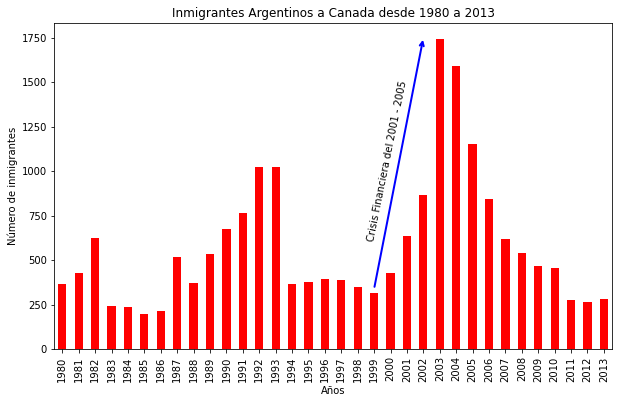

In [285]:
#ax=sns.countplot(x="years", hue="smoker", data= df_arg)
df_arg.plot(kind='bar', figsize=(10, 6), color="red")

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Argentinos a Canada desde 1980 a 2013') # agrega al gráfico el título

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(22, 1750),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(19, 340),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# Texto de la anotación
plt.annotate('Crisis Financiera del 2001 - 2005',  # texto a mostrar
             xy=(18.5, 600),  # comienzo del texto en el punto (año 2008 , pobla 30)
             rotation=78.5,  # Basado en la técnica de prueba y error para calzar con la flecha
             va='bottom',  # alineación vertical
             ha='left',  # alineación horizontal
             )
             
plt.show()

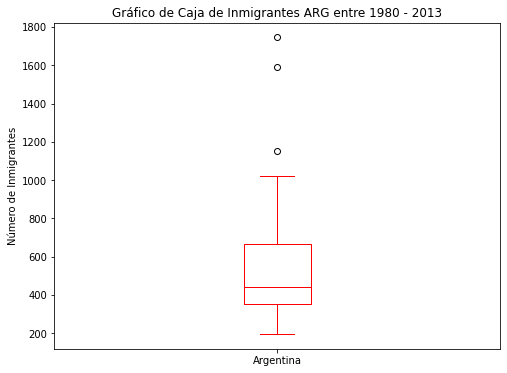

In [234]:
df_arg.plot(kind='box', figsize=(8, 6), color="red")

plt.title('Gráfico de Caja de Inmigrantes ARG entre 1980 - 2013')
plt.ylabel('Número de Inmigrantes')

plt.show()

<h2>Arbol de Decisión</h2>

In [105]:
df_can.columns

Index(['Country', 'Cod_continet', 'Continent', 'REG', 'Region', 'DevName',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [106]:
df_can

,Country,Cod_continet,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,935,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,65075
1,Albania,908,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,17532
2,Algeria,903,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,71254
3,American Samoa,909,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1872
4,Andorra,908,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,1848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,935,Asia,920,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,99001
191,Western Sahara,903,Africa,912,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1817
192,Yemen,935,Asia,922,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,4842
193,Zambia,903,Africa,910,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,3490


In [131]:
df_can[['Country', 'Cod_continet', 'Continent', 'REG', 'Region', 'DevName']].corr
df_can.corr().sort_values(by="Total")["Total"]

REG            0.219
Cod_continet   0.230
1985           0.711
1984           0.719
1982           0.749
1988           0.754
1989           0.755
1987           0.757
1990           0.762
1981           0.770
1980           0.771
1986           0.772
1983           0.787
1992           0.824
1991           0.850
1994           0.872
1993           0.888
2011           0.892
2003           0.907
1999           0.908
2012           0.909
2010           0.910
2000           0.912
2005           0.913
2013           0.916
2004           0.916
2002           0.917
1995           0.920
2006           0.931
2001           0.932
2009           0.937
2008           0.949
2007           0.950
1998           0.953
1996           0.957
1997           0.964
Total          1.000
Name: Total, dtype: float64

In [132]:
X3 = df_can[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013']].values
X3[0:5]

array([[  16,   39,   39,   47,   71,  340,  496,  741,  828, 1076, 1028,
        1378, 1170,  713,  858, 1537, 2212, 2555, 1999, 2395, 3326, 4067,
        3697, 3479, 2978, 3436, 3009, 2652, 2111, 1746, 1758, 2203, 2635,
        2004],
       [   1,    0,    0,    0,    0,    0,    1,    2,    2,    3,    3,
          21,   56,   96,   71,   63,  113,  307,  574, 1264, 1816, 1602,
        1021,  853, 1450, 1223,  856,  702,  560,  716,  561,  539,  620,
         603],
       [  80,   67,   71,   69,   63,   44,   69,  132,  242,  434,  491,
         872,  795,  717,  595, 1106, 2054, 1842, 2292, 2389, 2867, 3418,
        3406, 3072, 3616, 3626, 4807, 3623, 4005, 5393, 4752, 4325, 3774,
        4331],
       [   0,    1,    0,    0,    0,    0,    0,    1,    0,    1,    2,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    2,   

In [133]:
y3 = df_can["Total"]
y3[0:5]

0    65075
1    17532
2    71254
3     1872
4     1848
Name: Total, dtype: int64

In [134]:
X3_entrena, X3_prueba, y3_entrena, y3_prueba = train_test_split(X3, y3, test_size=0.3, random_state=3)
print ('Conjunto de Entrenamiento set:', X3_entrena.shape,  y3_entrena.shape)
print ('Conjunto de Prueba:', X3_prueba.shape,  y3_prueba.shape)

Conjunto de Entrenamiento set: (136, 34) (136,)
Conjunto de Prueba: (59, 34) (59,)


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
arbol_modelo = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
arbol_modelo

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [143]:
arbol_modelo.fit(X3_entrena,y3_entrena)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Una vez entrenado el modelo se puede proceder a realizar algunas predicciones con el conjunto de datos de prueba, las cuales serán almacenadas en una variable llamada `arbol_pronostico`.

In [144]:
arbol_pronostico = arbol_modelo.predict(X3_prueba)
arbol_pronostico

array([ 2833,  2018, 68365,  2081, 21431, 99001, 33638, 25665,  2903,
        1817, 25665,  2903, 68365,  3925,  3925,  4005, 19041,  2769,
        1874, 19041,  5167,  1944,  1838, 10108,  3860, 42384,  1817,
       11168,  2769,  3860,  2833,  6550,  2903,  2903,  5167, 11168,
        1944, 10108,  2767,  1817,  2769, 10108,  2769,  9590, 21431,
        2767,  5167, 25665,  2081,  3882,  2107, 17532,  1824,  2081,
       42384,  5167, 10910,  5040,  3925], dtype=int64)

In [145]:
print (arbol_pronostico [0:5])
print (y3_prueba [0:5])

[ 2833  2018 68365  2081 21431]
34      3467
25      2455
14     72004
102     2049
111    17503
Name: Total, dtype: int64


In [146]:
print("Precición del modelo basado en árbol de decisiones: ", metrics.accuracy_score(y3_prueba, arbol_pronostico))

Precición del modelo basado en árbol de decisiones:  0.0


In [147]:
precision_alternativo = np.sum(np.equal(y3_prueba, arbol_pronostico)) / len(y3_prueba)
precision_alternativo

0.0

In [197]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [216]:
#usar el metodo sum() para obtener el total por año
df_total= pd.DataFrame(df_can[years].sum(axis=0))

In [217]:
#cambiar los años al tipo entero
df_total.index=map(int, df_total.index)
#restablecer el indice,volver a colocarlo como una columna en el dataframe df_total
df_total.reset_index(inplace = True)
#renombrar columnas 
df_total. columns= ["year","total"]
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<function matplotlib.pyplot.show(close=None, block=None)>

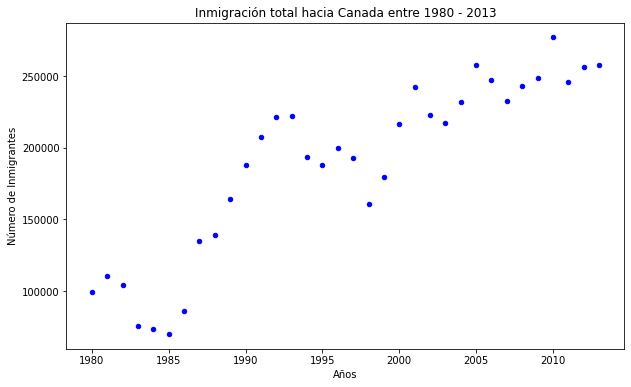

In [218]:
df_total.plot(kind= "scatter", x= "year", y="total", figsize=(10,6), color="blue")
plt.title("Inmigración total hacia Canada entre 1980 - 2013")
plt.xlabel("Años")
plt.ylabel("Número de Inmigrantes")
plt.show

<h2>Regresión Lineal Simple</h2>

In [219]:
model1= "year~total"
lm1 = smf.ols(formula =model1, data = df_total).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           7.10e-13
Time:                        19:26:23   Log-Likelihood:                -98.141
No. Observations:                  34   AIC:                             200.3
Df Residuals:                      32   BIC:                             203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1969.2617      2.495    789.284      0.0

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
predictors = ["year"]
x = df_total[predictors]
y= df_total["total"]

lm= LinearRegression()
model= lm.fit(x,y)

In [222]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -10926195.245378148
betas = [5567.09228419]


In [223]:
model.predict(x)

array([ 96647.47731093, 102214.56959511, 107781.6618793 , 113348.75416348,
       118915.84644767, 124482.93873186, 130050.03101604, 135617.12330023,
       141184.21558442, 146751.3078686 , 152318.40015279, 157885.49243698,
       163452.58472116, 169019.67700535, 174586.76928953, 180153.86157372,
       185720.95385791, 191288.04614209, 196855.13842628, 202422.23071047,
       207989.32299465, 213556.41527884, 219123.50756302, 224690.59984721,
       230257.6921314 , 235824.78441558, 241391.87669977, 246958.96898396,
       252526.06126814, 258093.15355233, 263660.24583652, 269227.3381207 ,
       274794.43040489, 280361.52268908])

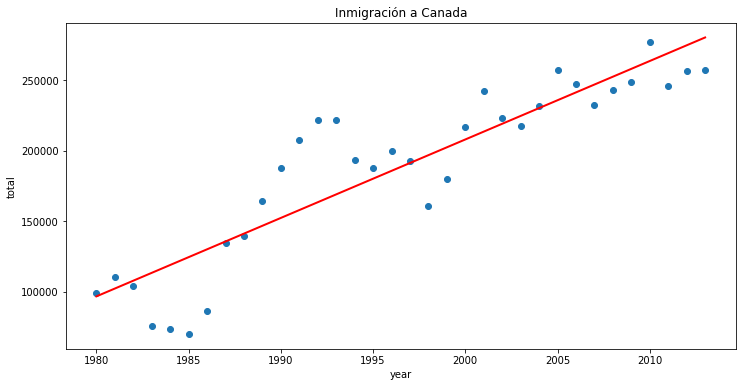

In [224]:
total_pred= model.predict(x)

plt.figure(figsize=(12,6))
plt.plot(df_total["year"],df_total["total"], 'o')
plt.plot(df_total["year"],total_pred,'r', linewidth=2)
plt.xlabel("year")
plt.ylabel("total")
plt.title("Inmigración a Canada")

plt.show()

In [225]:
x = df_total['year']      # año en el eje x
y = df_total['total']     # total en el eje y
ajuste = np.polyfit(x, y, deg=1)

ajuste

array([ 5.56709228e+03, -1.09261952e+07])

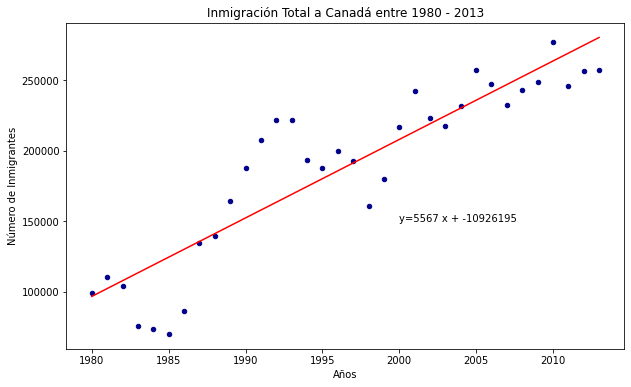

'Número de Inmigrantes = 5567 * Año + -10926195'

In [286]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Inmigración Total a Canadá entre 1980 - 2013')
plt.xlabel('Años')
plt.ylabel('Número de Inmigrantes')

# trazar la línea del mejor ajuste
plt.plot(x, ajuste[0] * x + ajuste[1], color='red') # recordar que x son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(ajuste[0], ajuste[1]), xy=(2000, 150000))

plt.show()
'Número de Inmigrantes = {0:.0f} * Año + {1:.0f}'.format(ajuste[0], ajuste[1]) 



<p> Al usar la ecuación de recta de mejor ajuste, se puede estimar el número de inmigrantes en 2015:

```python
Nº Inmigrantes = 5567 * Año - 10926195
Nº Inmigrantes = 5567 * 2015 - 10926195
Nº Inmigrantes = 291.310
```

En comparación con el informe anual de 2016 de Citizenship and Immigration Canada (CIC) (https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/annual-report-parliament-immigration-2016.html), se puede ver observar que Canadá aceptó 271.845 inmigrantes en 2015, que es bastante bueno. El valor estimado de 291,310 está dentro del 7% del número real, lo cual es bastante bueno considerando que nuestros datos originales provienen de las Naciones Unidas (y pueden diferir ligeramente de los datos de CIC).</p>
